# Appendix B: Miscellaneous About Plotnine and Pysocviz

NOTE: This section isn't contained in the original book. This is a supplement for Python users.

In [1]:
from plotnine import *
from mizani.formatters import percent_format
from pysocviz.p9extra import scale_color_pander, scale_color_colorblind, scale_color_OkabeIto
from pysocviz.loader import load_dataset
from gapminder import gapminder

theme_set(theme_minimal())

## Scaler Functions

I provide extra scale functions borrowed from **ggthemes** and **colorblindr** R packages.

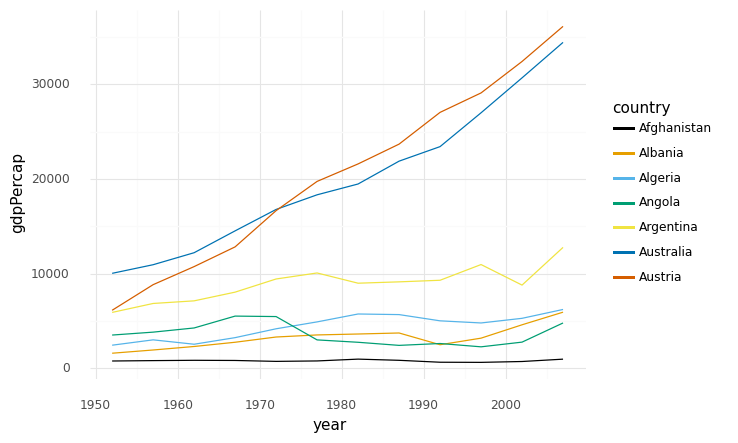

<ggplot: (8763373479093)>

In [2]:
p = ggplot(
    gapminder.loc[lambda d: d['country'].isin(gapminder['country'].unique()[:7])],
    aes(x='year', y='gdpPercap', color='country', group='country')) + geom_line()
p + scale_color_colorblind()

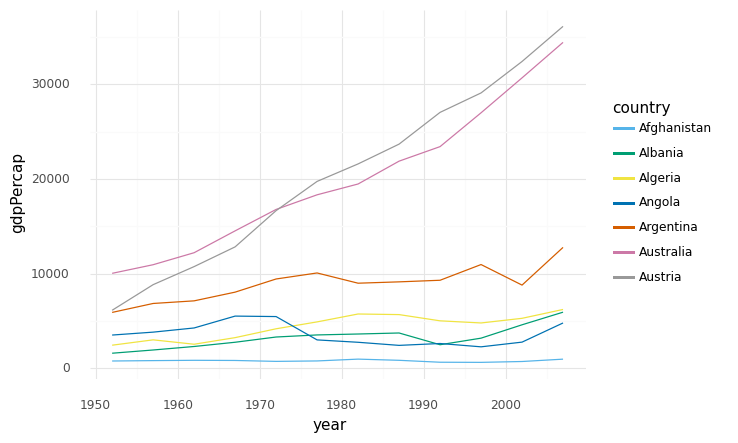

<ggplot: (8763301307127)>

In [3]:
p = ggplot(
    gapminder.loc[lambda d: d['country'].isin(gapminder['country'].unique()[:7])],
    aes(x='year', y='gdpPercap', color='country', group='country')) + geom_line()
p + scale_color_pander()

Currently because of my laziness, These functions have only 8 colors. So If the number of group is more than 8, the Error happens. But `scale_*_OkabeIto` can customize the order and repeat the colors.

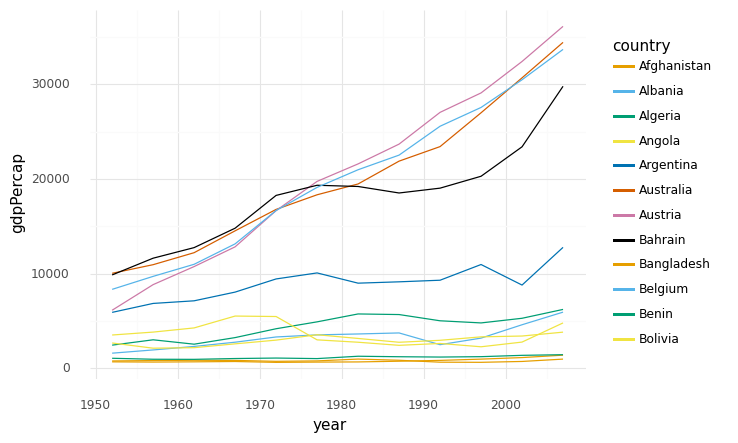

<ggplot: (8763301163602)>

In [4]:
p = ggplot(
    gapminder.loc[lambda d: d['country'].isin(gapminder['country'].unique()[:12])],
    aes(x='year', y='gdpPercap', color='country', group='country')) + geom_line()
p + scale_color_OkabeIto(order=list(range(8)) + list(range(4)))

## Pareto Chart and Secondary Y-Axis

Currently plotnine doesn't support multiple axes. (see https://github.com/has2k1/plotnine/issues/68)

So it is difficult to draw a Pareto chart strictly.

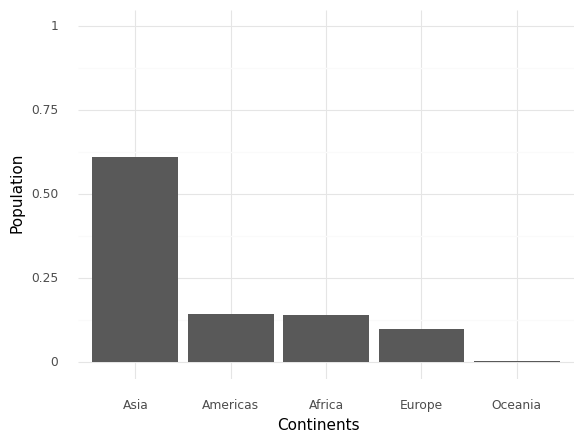

In [5]:
tmp = gapminder.loc[lambda d :d['year']==2002].groupby(
    'continent'
).sum().reset_index()
tmp['rate'] = tmp['pop']/tmp['pop'].sum()

p1 = ggplot(
    tmp,
    aes(x='reorder(continent, -pop)', y='rate')
) + geom_bar(stat='identity'
) + labs(x='Continents', y='Population'
) + coord_cartesian(ylim=[0, 1])
p1.draw();

In [6]:
tmp = tmp.sort_values('rate', ascending=False, ignore_index=True).assign(
    cumrate=lambda d: d['rate'].cumsum()
)

Normally, the both of scales varies but in the following plot, they don't  

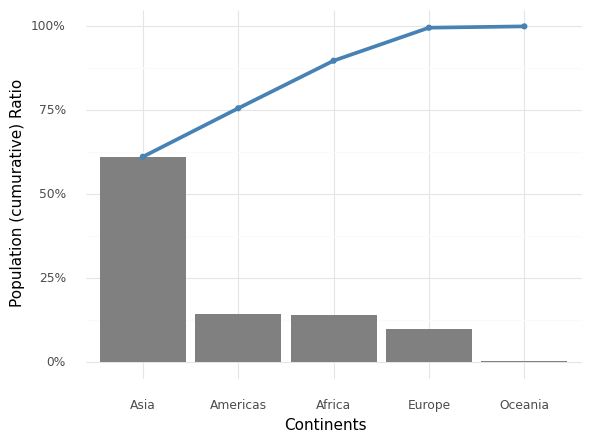

<ggplot: (8763301309974)>

In [7]:
p2 = ggplot(
    tmp, aes(x='reorder(continent, -pop)', y='cumrate')
) + geom_bar(aes(y='rate'), stat='identity', fill='gray'
) + geom_path(aes(group=1), color='steelblue', size=1.5
) + geom_point(color='steelblue', size=1.5
) + scale_y_continuous(labels=percent_format()
) + labs(x='Continents', y='Population (cumurative) Ratio')
p2